In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import re
from ast import literal_eval

# EDA

In [ ]:

# Load raw ESCI data
df_examples = pd.read_parquet("Shopping_queries_dataset_examples.parquet")
df_products = pd.read_parquet("Shopping_queries_dataset_products.parquet")

# Filter to U.S. data
df_examples_us = df_examples[
    (df_examples['product_locale'] == 'us') &
    (df_examples['small_version'] == 1)
]

df_products_us = df_products[
    (df_products['product_locale'] == 'us')
]

# Summary stats
summary = {
    "Metric": ["Unique US Queries", "US Judged Query-Product Pairs", "Unique US Products"],
    "Count": [
        df_examples_us['query'].nunique(),
        len(df_examples_us),
        df_products_us['product_id'].nunique()
    ]
}
summary_df = pd.DataFrame(summary)
print(summary_df)


                          Metric    Count
0              Unique US Queries    29844
1  US Judged Query-Product Pairs   601354
2             Unique US Products  1215854


In [3]:
df_products

,product_id,product_title,product_description,product_bullet_point,product_brand,product_color,product_locale
0,B079VKKJN7,"11 Degrees de los Hombres Playera con Logo, Ne...",Esta playera con el logo de la marca Carrier d...,11 Degrees Negro Playera con logo\nA estrenar ...,11 Degrees,Negro,es
1,B079Y9VRKS,Camiseta Eleven Degrees Core TS White (M),None,None,11 Degrees,Blanco,es
2,B07DP4LM9H,11 Degrees de los Hombres Core Pull Over Hoodi...,La sudadera con capucha Core Pull Over de 11 G...,11 Degrees Azul Core Pull Over Hoodie\nA estre...,11 Degrees,Azul,es
3,B07G37B9HP,11 Degrees Poli Panel Track Pant XL Black,None,None,11 Degrees,None,es
4,B07LCTGDHY,11 Degrees Gorra Trucker Negro OSFA (Talla úni...,None,None,11 Degrees,Negro (,es
...,...,...,...,...,...,...,...
1814919,B09FJYBVKS,スポーツブラ 揺れない ヨガウェア レディース トップス 通気性 ナイトブラ スポーツブラジ...,<p>【注意事項】</p><p>※商品内容以外のアクセサリー・小物等は付属しません.</p>...,シンプルのデザインで合わせやすいです。コート、半袖、シャツを合わせて、家で着てもいい、寝てい...,Doworspaw,ベージュ,jp
1814920,B09FTJ3S1N,ブラジャー レディース 補正ブラ Gabrioir 揺れない 大きいサイズ バストアップ美胸...,<p>【配送】</p><p>普通には2-3日後出荷できますが。出荷した後15-25日ぐらい届...,【いろんな場合に適用】軽い運動時、家事、外出、長時間移動、温泉旅行などに活用なセクシルームブ...,Gabrioir,パープル,jp
1814921,B09G72LDQZ,レディース ブラジャー 補正ブラ トップス Gabrioir 大きいサイズ 揺れない 脇高設...,<p>【配送】</p><p>普通には2-3日後出荷できますが。出荷した後15-25日ぐらい届...,【いろんな場合に適用】軽い運動時、家事、外出、長時間移動、温泉旅行などに活用なセクシルームブ...,Gabrioir,ベージュ,jp
1814922,B09GBGRTPB,ナイトブラ ノンワイヤーブラ ブラジャー レディース Gabrioir 大きいサイズ パット...,<p>【配送】</p><p>普通には2-3日後出荷できますが。出荷した後15-25日ぐらい届...,【いろんな場合に適用】軽い運動時、家事、外出、長時間移動、温泉旅行などに活用なセクシルームブ...,Gabrioir,パープル,jp


In [ ]:



def desc_cleaner(text):
    if pd.isnull(text): return ""
    cleaner = re.compile('<.*?>')
    return re.sub(cleaner, '', str(text)).strip()

In [5]:
# === Load full dataset again ===
df_full = pd.read_csv("data/processed_small_cleaned.csv")

📊 Null Value Counts:
example_id                   0
query                        0
query_id                     0
product_id                   0
product_locale               0
esci_label                   0
small_version                0
large_version                0
split                        0
product_title                1
product_description     300297
product_bullet_point     70128
product_brand            29656
product_color           184957
full_product_text            0
relevance                    0
dtype: int64

📝 Full Product Text Length Statistics:
count    601354.000000
mean        184.620032
std         152.880243
min           0.000000
25%          60.000000
50%         145.000000
75%         277.000000
max         971.000000
Name: full_text_len, dtype: float64


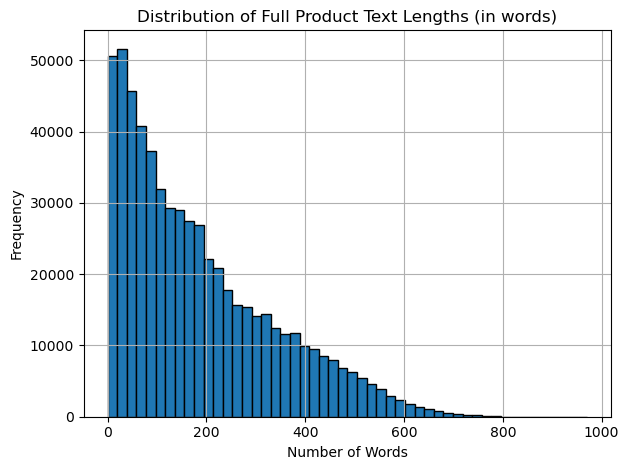

In [ ]:

# === Load cleaned dataset ===
df = pd.read_csv("data/processed_small_cleaned.csv")

# === Check null values per column ===
null_counts = df.isnull().sum()
print("📊 Null Value Counts:")
print(null_counts)

# === Calculate length of full_product_text ===
df['full_text_len'] = df['full_product_text'].apply(lambda x: len(str(x).split()))

# === Summary statistics ===
print("\n📝 Full Product Text Length Statistics:")
print(df['full_text_len'].describe())

# === Plot distribution ===


plt.hist(df['full_text_len'], bins=50, edgecolor='black')
plt.title('Distribution of Full Product Text Lengths (in words)')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()


# Dataset Generation

In [ ]:

# === File paths ===
example_path = "shopping_queries_dataset_examples.parquet"
product_path = "shopping_queries_dataset_products.parquet"
output_path = "data/processed_small.csv"

# === Load data ===
df_examples = pd.read_parquet(example_path)
df_products = pd.read_parquet(product_path)

# === Filter to small version and US locale ===
df_examples = df_examples[
    (df_examples["small_version"] == 1) &
    (df_examples["product_locale"] == "us")
]

# === Merge with product metadata ===
df = pd.merge(
    df_examples,
    df_products,
    how='left',
    on=["product_id", "product_locale"]
)

# === Fill nulls in relevant columns ===
for col in ['product_title', 'product_description', 'product_brand', 'product_bullet_point']:
    if col in df.columns:
        df[col] = df[col].fillna('')
    else:
        df[col] = ''

# === Create full product text ===
df['full_product_text'] = (
    df['product_title'] + ' ' +
    df['product_description'] + ' ' +
    df['product_brand'] + ' ' +
    df['product_bullet_point']
).str.strip()

# === Map ESCI labels to relevance scores ===
label_map = {"E": 3, "S": 2, "C": 1, "I": 0}
df['relevance'] = df['esci_label'].map(label_map)

# === Drop rows with missing or empty text ===
df = df[df['relevance'].notnull()]
df = df[df['query'].str.strip() != '']
df = df[df['full_product_text'].str.strip() != '']

# === Save the processed dataset ===
os.makedirs("data", exist_ok=True)
df.to_csv(output_path, index=False)
print(f"✅ Processed dataset saved to: {output_path}")


In [ ]:


def desc_cleaner(text):
    if pd.isnull(text): return ""
    cleaner = re.compile('<.*?>')
    return re.sub(cleaner, '', str(text)).strip()

df = pd.read_csv("data/processed_small.csv")

columns_to_clean = [
    'product_title',
    'product_description',
    'product_bullet_point',
    'product_brand'
]

for col in columns_to_clean:
    if col in df.columns:
        df[col] = df[col].apply(desc_cleaner)

# Optional: regenerate full_product_text
df['full_product_text'] = (
    df['product_title'] + ' ' +
    df['product_description'] + ' ' +
    df['product_brand'] + ' ' +
    df['product_bullet_point']
)

# Save cleaned version
df.to_csv("data/processed_small_cleaned.csv", index=False)

In [2]:
# === Load full dataset again ===
df_full = pd.read_csv("data/processed_small_cleaned.csv")

# === Load training set to exclude from test ===
df_train = pd.read_csv("data/train_balanced_25k.csv")

# === Remove overlaps between train and full to get test pool ===
df_test_pool = df_full.merge(
    df_train[["query", "product_id"]],
    on=["query", "product_id"],
    how="left",
    indicator=True
)
df_test_pool = df_test_pool[df_test_pool["_merge"] == "left_only"].drop(columns=["_merge"])

# === Keep only E and S for evaluation ===
df_eval_pool = df_test_pool[df_test_pool["relevance"] >= 2]

# === Group by query to collect all relevant products ===
query_to_product_map = (
    df_eval_pool
    .groupby("query")["product_id"]
    .apply(list)
    .reset_index(name="relevant_product_ids")
)

# === Sample N unique queries for evaluation ===
df_query_test = query_to_product_map.sample(n=4000, random_state=42).reset_index(drop=True)

In [6]:
df_query_test.to_csv('data/test_4k_query_only.csv')

In [12]:
df_query_test

,query,relevant_product_ids
0,boys christmas shirt,"[B07TZN5M43, B07KWVFV5C, B07J55N9NL, B07G7R2X6..."
1,mickey mouse photo booth frame,"[B086L111MD, B07DJXBTZC, B01GRVRNKK, B07DCNBFL1]"
2,0.5cc syringe without needle,"[B08QFGYYPH, B08L1KD91R, B08FFR6L7K, B07SFK6Z5..."
3,wig for prom for balc,"[B07V26NHHC, B07T2WMMVG, B07SVD5SHZ, B07LBJ1K9..."
4,gray black green grey khaki bdu,"[B077PSR3Z4, B077YQKJ8S, B07BH3LV7P, B07FXJCT1..."
...,...,...
495,bull boxer mens shoes,"[B07PGZXD4W, B07PGHBC6X, B07PDHHKCC, B07NDFL8Z..."
496,spark plug well seals,"[B07519CZDJ, B087RJ37PT, B07HRZC8FV, B07BT1XMJ..."
497,whose line is it anyway,"[B07THGVFHC, B07S5252D3, B07J56GQDK, B075G15PY..."
498,vintage shoes for women,"[B07RMNHV65, B07QF9P362, B07H55QQ1C, B07D63W2J..."


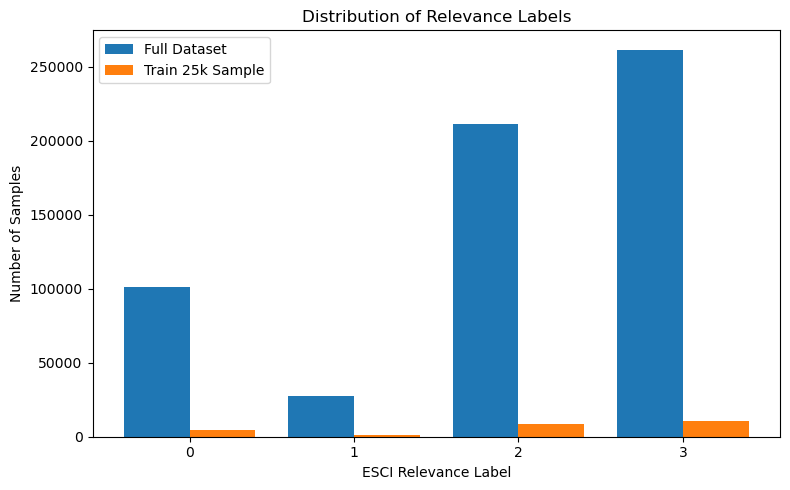

In [ ]:


# === Load datasets ===
df_full = pd.read_csv("data/processed_small_cleaned.csv")
df_train = pd.read_csv("data/train_balanced_25k.csv")

# === Count label distribution ===
full_counts = df_full['relevance'].value_counts().sort_index()
train_counts = df_train['relevance'].value_counts().sort_index()

# === Align both for consistent plotting ===
labels = sorted(set(full_counts.index).union(train_counts.index))
full_vals = [full_counts.get(label, 0) for label in labels]
train_vals = [train_counts.get(label, 0) for label in labels]

# === Plot bar chart ===
x = range(len(labels))
plt.figure(figsize=(8, 5))
plt.bar(x, full_vals, width=0.4, label='Full Dataset', align='center')
plt.bar([i + 0.4 for i in x], train_vals, width=0.4, label='Train 25k Sample', align='center')
plt.xticks([i + 0.2 for i in x], labels)
plt.xlabel("ESCI Relevance Label")
plt.ylabel("Number of Samples")
plt.title("Distribution of Relevance Labels")
plt.legend()
plt.tight_layout()
plt.show()


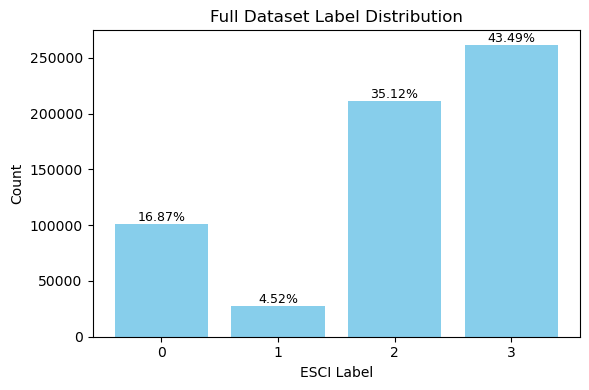

In [ ]:


# Count and normalize
full_counts = df_full['relevance'].value_counts().sort_index()
full_percent = full_counts / full_counts.sum()

# Plot
plt.figure(figsize=(6, 4))
bars = plt.bar(full_counts.index.astype(str), full_counts.values, color='skyblue')
plt.title("Full Dataset Label Distribution")
plt.xlabel("ESCI Label")
plt.ylabel("Count")

# Add percentage labels
for bar, pct in zip(bars, full_percent):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f"{pct:.2%}", 
             ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


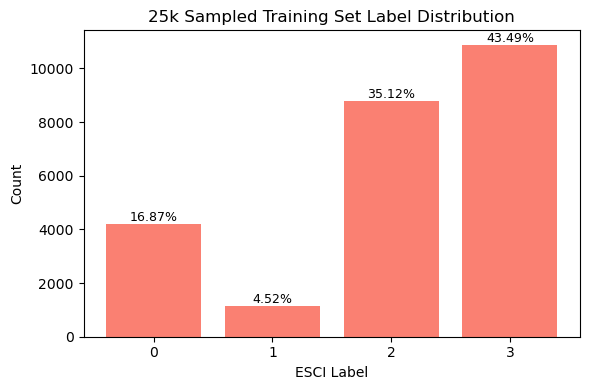

In [11]:

# Count and normalize
train_counts = df_train['relevance'].value_counts().sort_index()
train_percent = train_counts / train_counts.sum()

# Plot
plt.figure(figsize=(6, 4))
bars = plt.bar(train_counts.index.astype(str), train_counts.values, color='salmon')
plt.title("25k Sampled Training Set Label Distribution")
plt.xlabel("ESCI Label")
plt.ylabel("Count")

# Add percentage labels
for bar, pct in zip(bars, train_percent):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f"{pct:.2%}", 
             ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

In [11]:
import pandas as pd
from ast import literal_eval

# Load the test set
df_query_test = pd.read_csv("data/test_4k_query_only.csv")

# Convert stringified list to actual list
df_query_test["relevant_product_ids"] = df_query_test["relevant_product_ids"].apply(literal_eval)

# Compute average number of relevant products per query
avg_relevant_per_query = df_query_test["relevant_product_ids"].apply(len).mean()

print(f"📊 Average number of relevant products per query: {avg_relevant_per_query:.2f}")


📊 Average number of relevant products per query: 15.15
